In [1]:
# 支持多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

# 导入常用包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# 中文的正常显示
plt.rcParams['font.sans-serif']=['SimHei'] 

#用来正常坐标轴的数字的负号
plt.rcParams['axes.unicode_minus']=False 

## 食用菌类

In [2]:
import pandas as pd
merged_data=pd.read_csv('code2_merged_data.csv',encoding='gbk')
merged_data



,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:15:07.924,0.396,7.6,销售,否,4.32,7.08
1,102900005115960,大白菜,1011010101,花叶类,2020-07-01,09:17:27.295,0.849,3.2,销售,否,2.10,22.27
2,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:17:33.905,0.409,7.6,销售,否,4.32,7.08
3,102900005115823,上海青,1011010101,花叶类,2020-07-01,09:19:45.450,0.421,10.0,销售,否,7.03,14.43
4,102900005115908,菜心,1011010101,花叶类,2020-07-01,09:20:23.686,0.539,8.0,销售,否,4.60,13.70
...,...,...,...,...,...,...,...,...,...,...,...,...
878498,102900005115250,西峡花菇(1),1011010801,食用菌,2023-06-30,21:35:13.264,0.284,24.0,销售,否,15.60,10.80
878499,102900011022764,长线茄,1011010501,茄类,2023-06-30,21:35:14.358,0.669,12.0,销售,否,7.00,6.90
878500,102900005115250,西峡花菇(1),1011010801,食用菌,2023-06-30,21:35:20.264,0.125,24.0,销售,否,15.60,10.80
878501,102900011016701,芜湖青椒(1),1011010504,辣椒类,2023-06-30,21:35:21.509,0.252,5.2,销售,否,3.63,5.70


In [3]:
merged_data['分类名称'].unique()

array(['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'], dtype=object)

In [4]:
temp=merged_data[merged_data['分类名称']=='食用菌']
temp.reset_index(inplace=True,drop=True)

In [5]:
temp

,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005116530,西峡香菇(1),1011010801,食用菌,2020-07-01,09:24:21.905,0.217,18.0,销售,否,10.80,13.82
1,102900005116530,西峡香菇(1),1011010801,食用菌,2020-07-01,09:28:01.983,0.095,18.0,销售,否,10.80,13.82
2,102900005116530,西峡香菇(1),1011010801,食用菌,2020-07-01,09:35:13.164,0.256,18.0,销售,否,10.80,13.82
3,102900005116547,金针菇(1),1011010801,食用菌,2020-07-01,09:44:13.951,0.435,6.0,销售,否,4.06,3.43
4,102900005116547,金针菇(1),1011010801,食用菌,2020-07-01,09:44:54.358,0.452,6.0,销售,否,4.06,3.43
...,...,...,...,...,...,...,...,...,...,...,...,...
148419,102900005115250,西峡花菇(1),1011010801,食用菌,2023-06-30,21:26:00.717,0.180,24.0,销售,否,15.60,10.80
148420,102900005115250,西峡花菇(1),1011010801,食用菌,2023-06-30,21:32:08.779,0.117,24.0,销售,否,15.60,10.80
148421,102900011035740,蟹味菇与白玉菇双拼(盒),1011010801,食用菌,2023-06-30,21:32:10.219,1.000,2.9,销售,是,3.12,0.84
148422,102900005115250,西峡花菇(1),1011010801,食用菌,2023-06-30,21:35:13.264,0.284,24.0,销售,否,15.60,10.80


In [6]:
temp['销售日期'] = pd.to_datetime(temp['销售日期'])
temp.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\4250078519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['销售日期'] = pd.to_datetime(temp['销售日期'])


,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005116530,西峡香菇(1),1011010801,食用菌,2020-07-01,09:24:21.905,0.217,18.0,销售,否,10.80,13.82
1,102900005116530,西峡香菇(1),1011010801,食用菌,2020-07-01,09:28:01.983,0.095,18.0,销售,否,10.80,13.82
2,102900005116530,西峡香菇(1),1011010801,食用菌,2020-07-01,09:35:13.164,0.256,18.0,销售,否,10.80,13.82
3,102900005116547,金针菇(1),1011010801,食用菌,2020-07-01,09:44:13.951,0.435,6.0,销售,否,4.06,3.43
4,102900005116547,金针菇(1),1011010801,食用菌,2020-07-01,09:44:54.358,0.452,6.0,销售,否,4.06,3.43


In [7]:
temp1=temp.groupby('销售日期').mean()
temp1

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\1629465218.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp1=temp.groupby('销售日期').mean()


,单品编码,分类编码,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
销售日期,,,,,,
2020-07-01,1.029000e+14,1.011011e+09,0.294708,11.866667,7.314917,7.832333
2020-07-02,1.029000e+14,1.011011e+09,0.303187,13.638750,7.871937,8.830063
2020-07-03,1.029000e+14,1.011011e+09,0.284846,14.323490,8.120671,9.164832
2020-07-04,1.029000e+14,1.011011e+09,0.276386,14.091228,8.500234,8.971228
2020-07-05,1.029000e+14,1.011011e+09,0.353686,12.876329,7.707923,8.798647
...,...,...,...,...,...,...
2023-06-26,1.038252e+14,1.011011e+09,0.694421,11.135088,7.294035,5.571579
2023-06-27,1.045383e+14,1.011011e+09,0.679088,11.103509,7.402807,4.478421
2023-06-28,1.047017e+14,1.011011e+09,0.746417,9.529167,6.268194,4.113750


In [8]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd


X = temp1[['销量(千克)', '损耗率(%)']]
Y = temp1[['批发价格(元/千克)', '销售单价(元/千克)']]

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# 预测
predict_Y = pls.predict(X)

# 打印结果
print("系数矩阵：\n", pls.coef_)
print("截距：\n", pls.intercept_)
print("预测结果：\n", predict_Y)

系数矩阵：
 [[-1.36279142 -0.23483872]
 [-2.50928038 -0.65808033]]
截距：
 [ 7.75866069 12.14653138]
预测结果：
 [[ 9.86630133 16.12007954]
 [ 9.68394407 15.68438107]
 [ 9.81858705 15.89876756]
 ...
 [ 6.07873449  9.51854431]
 [ 6.22071987  9.78864026]
 [ 7.46590211 11.86991387]]


PLSRegression()

Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

Text(0.5, 1.0, '食用菌类偏最小二乘回归')

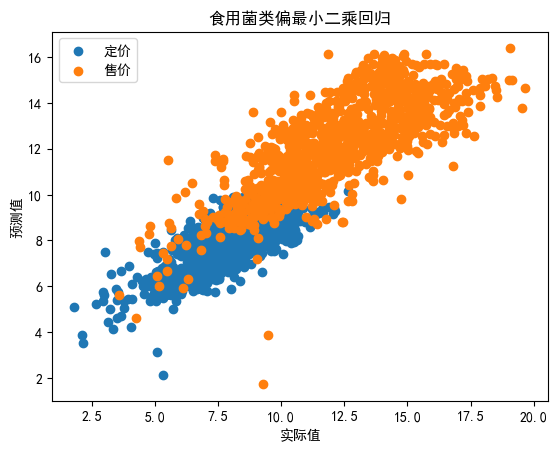

均方误差: 1.9462931923491738
R方值: 0.5820771447477193


In [8]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = temp1[['销量(千克)', '损耗率(%)']]
Y = temp1[['批发价格(元/千克)', '销售单价(元/千克)']]

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# 预测
predict_Y = pls.predict(X)

# 绘制回归图
plt.scatter(Y['批发价格(元/千克)'], predict_Y[:, 0], label='定价')
plt.scatter(Y['销售单价(元/千克)'], predict_Y[:, 1], label='售价')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('食用菌类偏最小二乘回归')
plt.legend()
plt.show()

# 计算均方误差
mse = mean_squared_error(Y, predict_Y)
print("均方误差:", mse)

# 计算R方值
r2_score = r2_score(Y, predict_Y)
print("R方值:", r2_score)

Epoch 1/50
27/27 [==============================] - 3s 19ms/step - loss: 106.6007
Epoch 2/50
27/27 [==============================] - 1s 21ms/step - loss: 24.2602
Epoch 3/50
27/27 [==============================] - 1s 21ms/step - loss: 11.7428
Epoch 4/50
27/27 [==============================] - 1s 22ms/step - loss: 8.6030
Epoch 5/50
27/27 [==============================] - 1s 19ms/step - loss: 7.6021
Epoch 6/50
27/27 [==============================] - 1s 23ms/step - loss: 7.3236
Epoch 7/50
27/27 [==============================] - 1s 20ms/step - loss: 7.2396
Epoch 8/50
27/27 [==============================] - 1s 19ms/step - loss: 7.2235
Epoch 9/50
27/27 [==============================] - 1s 19ms/step - loss: 7.2237
Epoch 10/50
27/27 [==============================] - 1s 22ms/step - loss: 7.2199
Epoch 11/50
27/27 [==============================] - 1s 23ms/step - loss: 7.2259
Epoch 12/50
27/27 [==============================] - 1s 20ms/step - loss: 7.2223
Epoch 13/50
27/27 [==============

7/7 [==============================] - 0s 5ms/step
均方根误差（RMSE）： 2.81872187150935


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

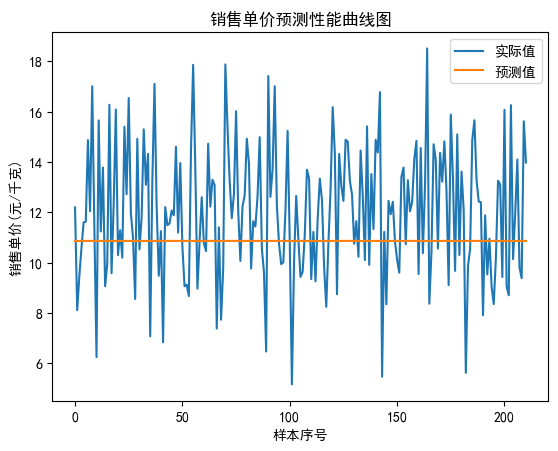

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp1[['销量(千克)']]
target = temp1['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 30

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


Epoch 1/100
26/26 [==============================] - 3s 29ms/step - loss: 78.1105
Epoch 2/100
26/26 [==============================] - 1s 28ms/step - loss: 9.8399
Epoch 3/100
26/26 [==============================] - 1s 28ms/step - loss: 7.1539
Epoch 4/100
26/26 [==============================] - 1s 29ms/step - loss: 7.0939
Epoch 5/100
26/26 [==============================] - 1s 32ms/step - loss: 7.0962
Epoch 6/100
26/26 [==============================] - 1s 31ms/step - loss: 7.0954
Epoch 7/100
26/26 [==============================] - 1s 32ms/step - loss: 7.1007
Epoch 8/100
26/26 [==============================] - 1s 28ms/step - loss: 7.0957
Epoch 9/100
26/26 [==============================] - 1s 28ms/step - loss: 7.0977
Epoch 10/100
26/26 [==============================] - 1s 28ms/step - loss: 7.0958
Epoch 11/100
26/26 [==============================] - 1s 28ms/step - loss: 7.0950
Epoch 12/100
26/26 [==============================] - 1s 30ms/step - loss: 7.1069
Epoch 13/100
26/26 [====

7/7 [==============================] - 1s 12ms/step
均方根误差（RMSE）： 3.1805803228540492


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

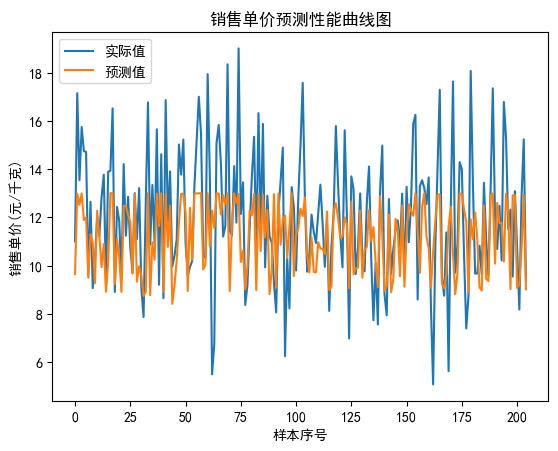

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp1[['销量(千克)']]
target = temp1['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 60

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()

Epoch 1/150
13/13 [==============================] - 10s 472ms/step - loss: 102.8831
Epoch 2/150
13/13 [==============================] - 6s 484ms/step - loss: 12.0417
Epoch 3/150
13/13 [==============================] - 6s 484ms/step - loss: 8.8281
Epoch 4/150
13/13 [==============================] - 6s 490ms/step - loss: 7.3771
Epoch 5/150
13/13 [==============================] - 7s 505ms/step - loss: 7.1891
Epoch 6/150
13/13 [==============================] - 7s 501ms/step - loss: 7.0513
Epoch 7/150
13/13 [==============================] - 7s 500ms/step - loss: 7.0855
Epoch 8/150
13/13 [==============================] - 7s 508ms/step - loss: 7.0559
Epoch 9/150
13/13 [==============================] - 7s 520ms/step - loss: 7.0698
Epoch 10/150
13/13 [==============================] - 7s 526ms/step - loss: 7.0518
Epoch 11/150
13/13 [==============================] - 7s 516ms/step - loss: 7.2199
Epoch 12/150
13/13 [==============================] - 7s 509ms/step - loss: 7.0638
Epoch 13/

7/7 [==============================] - 1s 58ms/step
均方根误差（RMSE）： 3.0053808832241597


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

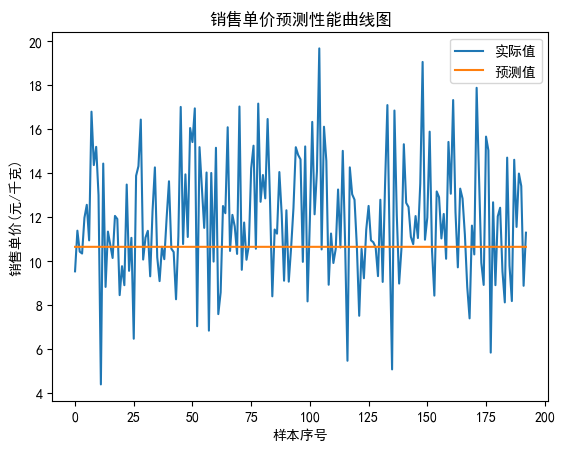

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp1[['销量(千克)']]
target = temp1['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 120

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=150, batch_size=64, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


## 辣椒类

In [9]:
temp2=merged_data[merged_data['分类名称']=='辣椒类']
temp2.reset_index(inplace=True,drop=True)

In [10]:
temp2

,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:15:07.924,0.396,7.6,销售,否,4.32,7.08
1,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:17:33.905,0.409,7.6,销售,否,4.32,7.08
2,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:21:55.556,0.277,7.6,销售,否,4.32,7.08
3,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:22:01.274,0.132,7.6,销售,否,4.32,7.08
4,102900005116226,青尖椒,1011010504,辣椒类,2020-07-01,09:25:31.342,0.589,8.0,销售,否,4.64,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...
207991,102900011016701,芜湖青椒(1),1011010504,辣椒类,2023-06-30,21:16:24.576,0.097,5.2,销售,否,3.63,5.70
207992,102900011032251,螺丝椒(份),1011010504,辣椒类,2023-06-30,21:21:45.966,1.000,3.5,销售,是,4.29,9.43
207993,102900011031100,小米椒(份),1011010504,辣椒类,2023-06-30,21:21:46.069,1.000,5.8,销售,否,2.11,9.43
207994,102900011032022,小皱皮(份),1011010504,辣椒类,2023-06-30,21:22:44.078,1.000,2.8,销售,否,2.10,9.43


In [11]:
temp2['销售日期'] = pd.to_datetime(temp2['销售日期'])
temp2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\404432259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['销售日期'] = pd.to_datetime(temp2['销售日期'])


,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:15:07.924,0.396,7.6,销售,否,4.32,7.08
1,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:17:33.905,0.409,7.6,销售,否,4.32,7.08
2,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:21:55.556,0.277,7.6,销售,否,4.32,7.08
3,102900005117056,泡泡椒(精品),1011010504,辣椒类,2020-07-01,09:22:01.274,0.132,7.6,销售,否,4.32,7.08
4,102900005116226,青尖椒,1011010504,辣椒类,2020-07-01,09:25:31.342,0.589,8.0,销售,否,4.64,6.72


In [12]:
temp2=temp2.groupby('销售日期').mean()
temp2

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\383726187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp2=temp2.groupby('销售日期').mean()


,单品编码,分类编码,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
销售日期,,,,,,
2020-07-01,1.029000e+14,1.011011e+09,0.296197,12.379151,6.372510,7.684749
2020-07-02,1.029000e+14,1.011011e+09,0.292319,12.690265,6.779646,8.050752
2020-07-03,1.029000e+14,1.011011e+09,0.283053,12.840529,7.122731,8.219736
2020-07-04,1.029000e+14,1.011011e+09,0.277413,12.247099,6.454505,8.019454
2020-07-05,1.029000e+14,1.011011e+09,0.279818,12.128977,6.572500,8.266449
...,...,...,...,...,...,...
2023-06-26,1.029000e+14,1.011011e+09,0.627696,7.684348,4.482174,8.450957
2023-06-27,1.029000e+14,1.011011e+09,0.621481,7.739815,4.752593,8.159444
2023-06-28,1.029000e+14,1.011011e+09,0.646547,7.756604,4.677547,8.572075


Epoch 1/50
27/27 [==============================] - 4s 21ms/step - loss: 85.3219
Epoch 2/50
27/27 [==============================] - 1s 22ms/step - loss: 23.2413
Epoch 3/50
27/27 [==============================] - 1s 21ms/step - loss: 21.0984
Epoch 4/50
27/27 [==============================] - 1s 22ms/step - loss: 21.0512
Epoch 5/50
27/27 [==============================] - 1s 20ms/step - loss: 21.0479
Epoch 6/50
27/27 [==============================] - 1s 20ms/step - loss: 21.0502
Epoch 7/50
27/27 [==============================] - 1s 19ms/step - loss: 21.0486
Epoch 8/50
27/27 [==============================] - 1s 20ms/step - loss: 21.0522
Epoch 9/50
27/27 [==============================] - 1s 23ms/step - loss: 21.0333
Epoch 10/50
27/27 [==============================] - 1s 20ms/step - loss: 21.0879
Epoch 11/50
27/27 [==============================] - 1s 19ms/step - loss: 21.0733
Epoch 12/50
27/27 [==============================] - 1s 19ms/step - loss: 21.0676
Epoch 13/50
27/27 [======

7/7 [==============================] - 0s 6ms/step
均方根误差（RMSE）： 4.650212356473835


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

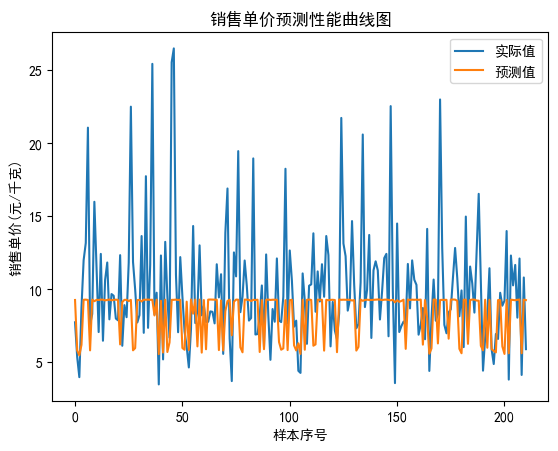

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp2[['销量(千克)']]
target = temp2['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 30

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


Epoch 1/100
13/13 [==============================] - 12s 661ms/step - loss: 72.7001
Epoch 2/100
13/13 [==============================] - 9s 663ms/step - loss: 23.2233
Epoch 3/100
13/13 [==============================] - 8s 636ms/step - loss: 21.7695
Epoch 4/100
13/13 [==============================] - 9s 662ms/step - loss: 21.6974
Epoch 5/100
13/13 [==============================] - 8s 643ms/step - loss: 21.8400
Epoch 6/100
13/13 [==============================] - 9s 650ms/step - loss: 21.6263
Epoch 7/100
13/13 [==============================] - 8s 643ms/step - loss: 21.5452
Epoch 8/100
13/13 [==============================] - 9s 658ms/step - loss: 21.5857
Epoch 9/100
13/13 [==============================] - 8s 645ms/step - loss: 21.5851
Epoch 10/100
13/13 [==============================] - 8s 648ms/step - loss: 21.8420
Epoch 11/100
13/13 [==============================] - 9s 658ms/step - loss: 21.6944
Epoch 12/100
13/13 [==============================] - 8s 635ms/step - loss: 21.6086


7/7 [==============================] - 1s 61ms/step
均方根误差（RMSE）： 5.216263102477009


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

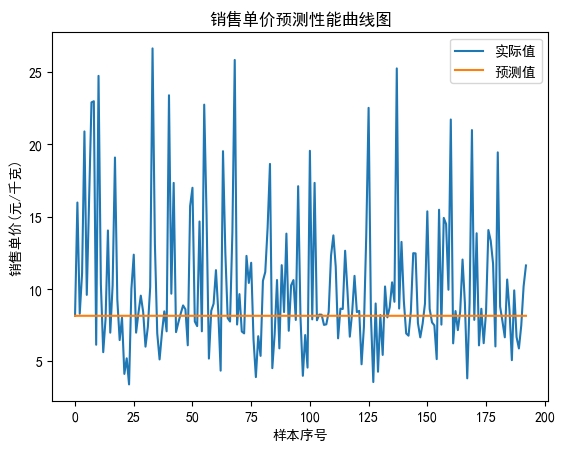

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp2[['销量(千克)']]
target = temp2['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 120

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


In [20]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd


X = temp2[['销量(千克)', '损耗率(%)']]
Y = temp2[['批发价格(元/千克)', '销售单价(元/千克)']]

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# 预测
predict_Y = pls.predict(X)

# 打印结果
print("系数矩阵：\n", pls.coef_)
print("截距：\n", pls.intercept_)
print("预测结果：\n", predict_Y)

PLSRegression()

系数矩阵：
 [[-1.56037604  0.8550411 ]
 [-2.28663973  1.35501557]]
截距：
 [ 6.56554357 10.24723931]
预测结果：
 [[ 7.85041668 12.11977546]
 [ 8.41349994 13.0078683 ]
 [ 8.74207949 13.51843588]
 ...
 [ 5.91383055  9.43438077]
 [ 5.48110763  8.76885643]
 [ 5.66151917  9.00916729]]


PLSRegression()

Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

Text(0.5, 1.0, '辣椒类偏最小二乘回归')

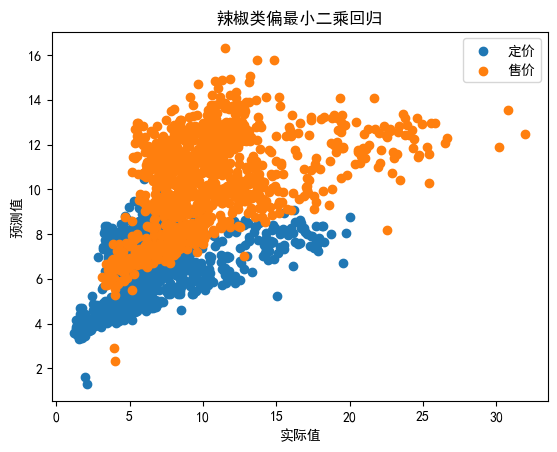

均方误差: 11.940614357347194
R方值: 0.21162505599100273


In [13]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = temp2[['销量(千克)', '损耗率(%)']]
Y = temp2[['批发价格(元/千克)', '销售单价(元/千克)']]

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# 预测
predict_Y = pls.predict(X)

# 绘制回归图
plt.scatter(Y['批发价格(元/千克)'], predict_Y[:, 0], label='定价')
plt.scatter(Y['销售单价(元/千克)'], predict_Y[:, 1], label='售价')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('辣椒类偏最小二乘回归')
plt.legend()
plt.show()

# 计算均方误差
mse = mean_squared_error(Y, predict_Y)
print("均方误差:", mse)

# 计算R方值
r2_score = r2_score(Y, predict_Y)
print("R方值:", r2_score)

PLSRegression()

系数矩阵：
 [[-0.47569621  0.26066781]
 [-0.51464271  0.30496666]]
截距：
 [1.30975619e-16 7.85853717e-17]
预测结果：
 [[ 7.85041668 12.11977546]
 [ 8.41349994 13.0078683 ]
 [ 8.74207949 13.51843588]
 ...
 [ 5.91383055  9.43438077]
 [ 5.48110763  8.76885643]
 [ 5.66151917  9.00916729]]
均方误差: 11.940614357347188
R方值: 0.2116250559910029


Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

Text(0.5, 1.0, '辣椒类偏最小二乘回归')

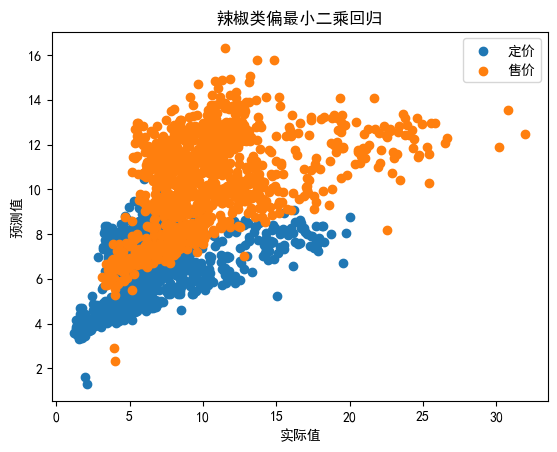

In [14]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 归一化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(temp2[['销量(千克)', '损耗率(%)']])
Y_scaled = scaler.fit_transform(temp2[['批发价格(元/千克)', '销售单价(元/千克)']])

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X_scaled, Y_scaled)

# 预测
predict_Y_scaled = pls.predict(X_scaled)

# 反归一化预测结果
predict_Y = scaler.inverse_transform(predict_Y_scaled)

# 打印结果
print("系数矩阵：\n", pls.coef_)
print("截距：\n", pls.intercept_)
print("预测结果：\n", predict_Y)

# 计算均方误差
mse = mean_squared_error(Y, predict_Y)
print("均方误差:", mse)

# 计算R方值
r2_score = r2_score(Y, predict_Y)
print("R方值:", r2_score)

# 绘制回归图
plt.scatter(temp2['批发价格(元/千克)'], predict_Y[:, 0], label='定价')
plt.scatter(temp2['销售单价(元/千克)'], predict_Y[:, 1], label='售价')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('辣椒类偏最小二乘回归')
plt.legend()
plt.show()


## 花叶类

In [15]:
temp3=merged_data[merged_data['分类名称']=='花叶类']
temp3.reset_index(inplace=True,drop=True)


In [16]:
temp3['销售日期'] = pd.to_datetime(temp3['销售日期'])
temp3.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\4276278999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp3['销售日期'] = pd.to_datetime(temp3['销售日期'])


,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005115960,大白菜,1011010101,花叶类,2020-07-01,09:17:27.295,0.849,3.2,销售,否,2.10,22.27
1,102900005115823,上海青,1011010101,花叶类,2020-07-01,09:19:45.450,0.421,10.0,销售,否,7.03,14.43
2,102900005115908,菜心,1011010101,花叶类,2020-07-01,09:20:23.686,0.539,8.0,销售,否,4.60,13.70
3,102900005115779,云南生菜,1011010101,花叶类,2020-07-01,09:21:56.536,0.338,8.0,销售,否,6.72,15.25
4,102900005115779,云南生菜,1011010101,花叶类,2020-07-01,09:22:01.476,0.213,8.0,销售,否,6.72,15.25


In [17]:
temp3=temp3.groupby('销售日期').mean()
temp3

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\4018803148.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp3=temp3.groupby('销售日期').mean()


,单品编码,分类编码,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
销售日期,,,,,,
2020-07-01,1.029000e+14,1.011010e+09,0.461578,7.603820,5.137371,13.304809
2020-07-02,1.029000e+14,1.011010e+09,0.468941,7.238534,4.237376,13.088511
2020-07-03,1.029000e+14,1.011010e+09,0.469899,7.432759,4.474704,13.496108
2020-07-04,1.029000e+14,1.011010e+09,0.449785,7.842966,4.921863,13.797928
2020-07-05,1.029000e+14,1.011010e+09,0.440746,7.105512,4.368524,12.544429
...,...,...,...,...,...,...
2023-06-26,1.029000e+14,1.011010e+09,0.479310,5.723214,3.605833,12.677619
2023-06-27,1.029000e+14,1.011010e+09,0.649378,5.036735,3.276888,11.101020
2023-06-28,1.029000e+14,1.011010e+09,0.671041,4.930928,3.345000,10.617010


Epoch 1/50
27/27 [==============================] - 4s 20ms/step - loss: 20.2653
Epoch 2/50
27/27 [==============================] - 1s 22ms/step - loss: 2.5222
Epoch 3/50
27/27 [==============================] - 1s 23ms/step - loss: 2.3676
Epoch 4/50
27/27 [==============================] - 1s 22ms/step - loss: 2.3512
Epoch 5/50
27/27 [==============================] - 1s 19ms/step - loss: 2.3598
Epoch 6/50
27/27 [==============================] - 1s 20ms/step - loss: 2.3545
Epoch 7/50
27/27 [==============================] - 1s 19ms/step - loss: 2.2922
Epoch 8/50
27/27 [==============================] - 1s 19ms/step - loss: 2.2511
Epoch 9/50
27/27 [==============================] - 1s 20ms/step - loss: 2.3997
Epoch 10/50
27/27 [==============================] - 1s 19ms/step - loss: 2.3353
Epoch 11/50
27/27 [==============================] - 1s 19ms/step - loss: 2.2834
Epoch 12/50
27/27 [==============================] - 1s 19ms/step - loss: 2.1939
Epoch 13/50
27/27 [=================

7/7 [==============================] - 1s 12ms/step
均方根误差（RMSE）： 1.6841839171930186


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

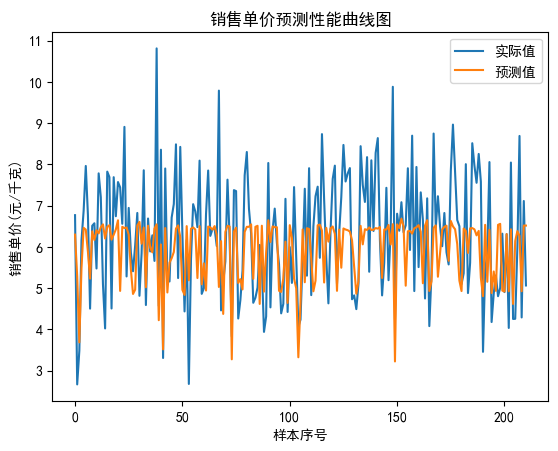

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp3[['销量(千克)']]
target = temp3['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 30

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


Epoch 1/100
26/26 [==============================] - 3s 28ms/step - loss: 15.7010
Epoch 2/100
26/26 [==============================] - 1s 26ms/step - loss: 2.4059
Epoch 3/100
26/26 [==============================] - 1s 26ms/step - loss: 2.4412
Epoch 4/100
26/26 [==============================] - 1s 26ms/step - loss: 2.4624
Epoch 5/100
26/26 [==============================] - 1s 26ms/step - loss: 2.3920
Epoch 6/100
26/26 [==============================] - 1s 26ms/step - loss: 2.3984
Epoch 7/100
26/26 [==============================] - 1s 26ms/step - loss: 2.3833
Epoch 8/100
26/26 [==============================] - 1s 27ms/step - loss: 2.3893
Epoch 9/100
26/26 [==============================] - 1s 26ms/step - loss: 2.3905
Epoch 10/100
26/26 [==============================] - 1s 28ms/step - loss: 2.3775
Epoch 11/100
26/26 [==============================] - 1s 29ms/step - loss: 2.3947
Epoch 12/100
26/26 [==============================] - 1s 27ms/step - loss: 2.3972
Epoch 13/100
26/26 [====

7/7 [==============================] - 1s 10ms/step
均方根误差（RMSE）： 1.7087565218931757


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

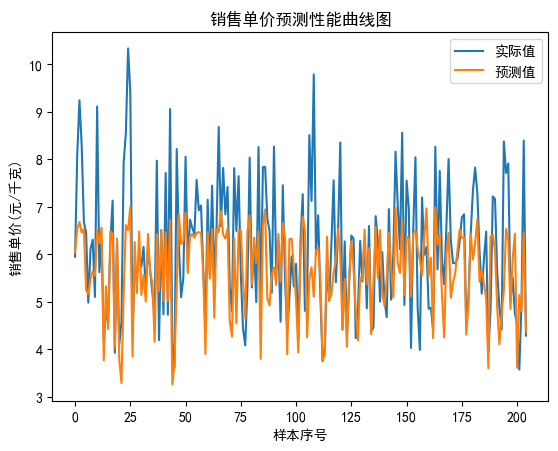

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp3[['销量(千克)']]
target = temp3['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 60

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()

PLSRegression()

系数矩阵：
 [[-0.48701201  0.08636034]
 [-0.54673447  0.0617204 ]]
截距：
 [-2.61951239e-17  1.57170743e-16]
预测结果：
 [[4.2777019  7.02282461]
 [4.24488436 6.97295615]
 [4.2597844  6.98719642]
 ...
 [3.49659926 5.76907585]
 [3.5082079  5.77301721]
 [3.52513343 5.79709114]]
均方误差: 26.362038913209037
R方值: -0.7127461327081827


Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

Text(0.5, 1.0, '花叶类偏最小二乘回归')

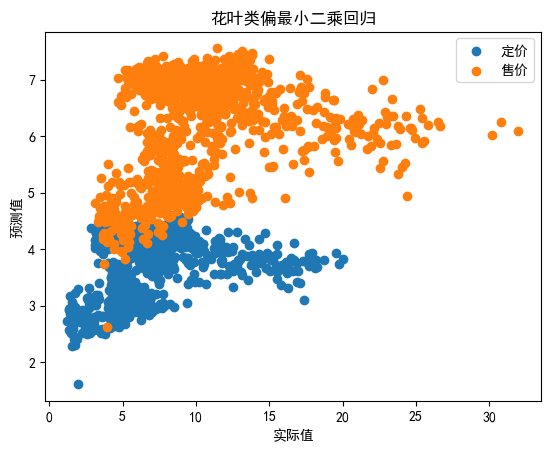

In [18]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 归一化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(temp3[['销量(千克)', '损耗率(%)']])
Y_scaled = scaler.fit_transform(temp3[['批发价格(元/千克)', '销售单价(元/千克)']])

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X_scaled, Y_scaled)

# 预测
predict_Y_scaled = pls.predict(X_scaled)

# 反归一化预测结果
predict_Y = scaler.inverse_transform(predict_Y_scaled)

# 打印结果
print("系数矩阵：\n", pls.coef_)
print("截距：\n", pls.intercept_)
print("预测结果：\n", predict_Y)

# 计算均方误差
mse = mean_squared_error(Y, predict_Y)
print("均方误差:", mse)

# 计算R方值
r2_score = r2_score(Y, predict_Y)
print("R方值:", r2_score)

# 绘制回归图
plt.scatter(temp2['批发价格(元/千克)'], predict_Y[:, 0], label='定价')
plt.scatter(temp2['销售单价(元/千克)'], predict_Y[:, 1], label='售价')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('花叶类偏最小二乘回归')
plt.legend()
plt.show()


## 花菜类

In [19]:
temp6=merged_data[merged_data['分类名称']=='花菜类']
temp6.reset_index(inplace=True,drop=True)

In [20]:
temp6['销售日期'] = pd.to_datetime(temp6['销售日期'])
temp6.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\1615612462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp6['销售日期'] = pd.to_datetime(temp6['销售日期'])


,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005116714,西兰花,1011010201,花菜类,2020-07-01,09:33:09.998,0.329,14.0,销售,否,9.23,9.26
1,102900011009970,青梗散花,1011010201,花菜类,2020-07-01,09:36:36.108,0.445,9.0,销售,否,6.03,17.06
2,102900005116714,西兰花,1011010201,花菜类,2020-07-01,09:46:00.634,0.522,14.0,销售,否,9.23,9.26
3,102900011009970,青梗散花,1011010201,花菜类,2020-07-01,09:46:43.139,0.368,9.0,销售,否,6.03,17.06
4,102900005116714,西兰花,1011010201,花菜类,2020-07-01,09:51:24.696,0.236,14.0,销售,否,9.23,9.26


In [21]:
temp6=temp6.groupby('销售日期').mean()
temp6

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\2304873319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp6=temp6.groupby('销售日期').mean()


,单品编码,分类编码,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
销售日期,,,,,,
2020-07-01,1.029000e+14,1.011010e+09,0.452816,12.834951,8.484369,11.077476
2020-07-02,1.029000e+14,1.011010e+09,0.462558,12.421053,7.832632,11.723158
2020-07-03,1.029000e+14,1.011010e+09,0.438292,12.000000,7.583333,11.860000
2020-07-04,1.029000e+14,1.011010e+09,0.441762,12.619048,8.220476,11.055238
2020-07-05,1.029000e+14,1.011010e+09,0.523340,12.641509,8.442075,11.026038
...,...,...,...,...,...,...
2023-06-26,1.029000e+14,1.011010e+09,0.404150,14.000000,7.940000,9.260000
2023-06-27,1.029000e+14,1.011010e+09,0.509714,12.000000,7.800000,9.260000
2023-06-28,1.029000e+14,1.011010e+09,0.446361,12.277778,7.795833,9.283611


Epoch 1/50
27/27 [==============================] - 2s 10ms/step - loss: 64.8589
Epoch 2/50
27/27 [==============================] - 0s 10ms/step - loss: 6.9433
Epoch 3/50
27/27 [==============================] - 0s 10ms/step - loss: 6.3524
Epoch 4/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2898
Epoch 5/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2738
Epoch 6/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2785
Epoch 7/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2744
Epoch 8/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2820
Epoch 9/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2834
Epoch 10/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2817
Epoch 11/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2836
Epoch 12/50
27/27 [==============================] - 0s 10ms/step - loss: 6.2802
Epoch 13/50
27/27 [=================

7/7 [==============================] - 0s 5ms/step
均方根误差（RMSE）： 2.5002189926465346


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

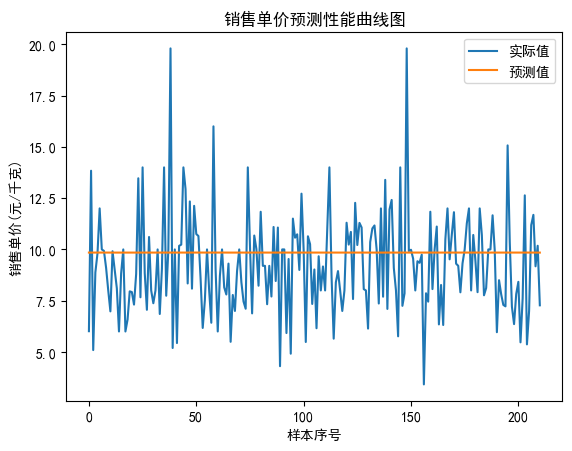

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp6[['销量(千克)']]
target = temp6['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 30

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


PLSRegression()

Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

Text(0.5, 1.0, '花菜类偏最小二乘回归')

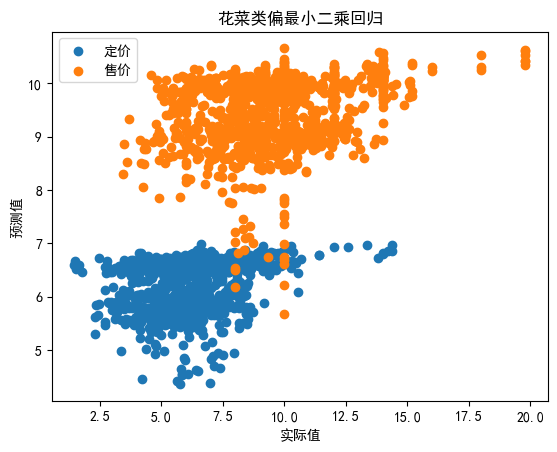

均方误差: 4.27296661576732
R方值: 0.07443150541362054


In [22]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = temp6[['销量(千克)', '损耗率(%)']]
Y = temp6[['批发价格(元/千克)', '销售单价(元/千克)']]

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# 预测
predict_Y = pls.predict(X)

# 绘制回归图
plt.scatter(Y['批发价格(元/千克)'], predict_Y[:, 0], label='定价')
plt.scatter(Y['销售单价(元/千克)'], predict_Y[:, 1], label='售价')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('花菜类偏最小二乘回归')
plt.legend()
plt.show()

# 计算均方误差
mse = mean_squared_error(Y, predict_Y)
print("均方误差:", mse)

# 计算R方值
r2_score = r2_score(Y, predict_Y)
print("R方值:", r2_score)

## 茄类

In [23]:
temp4=merged_data[merged_data['分类名称']=='茄类']
temp4.reset_index(inplace=True,drop=True)

In [24]:
temp4['销售日期'] = pd.to_datetime(temp4['销售日期'])
temp4.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\1029255237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp4['销售日期'] = pd.to_datetime(temp4['销售日期'])


,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005116509,青茄子(1),1011010501,茄类,2020-07-01,10:01:04.530,0.829,4.0,销售,否,1.63,5.01
1,102900005116509,青茄子(1),1011010501,茄类,2020-07-01,10:02:47.115,0.402,4.0,销售,否,1.63,5.01
2,102900005116509,青茄子(1),1011010501,茄类,2020-07-01,10:07:09.210,0.402,4.0,销售,否,1.63,5.01
3,102900005116509,青茄子(1),1011010501,茄类,2020-07-01,10:09:28.663,0.427,4.0,销售,否,1.63,5.01
4,102900005116257,紫茄子(2),1011010501,茄类,2020-07-01,10:12:18.196,0.585,6.0,销售,否,6.56,6.07


In [25]:
temp4=temp4.groupby('销售日期').mean()
temp4

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\180977302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp4=temp4.groupby('销售日期').mean()


,单品编码,分类编码,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
销售日期,,,,,,
2020-07-01,1.029000e+14,1.011011e+09,0.589567,5.066667,4.259333,5.575333
2020-07-02,1.029000e+14,1.011011e+09,0.574982,5.392857,2.509286,5.502143
2020-07-03,1.029000e+14,1.011011e+09,0.629754,5.736842,4.421053,5.623684
2020-07-04,1.029000e+14,1.011011e+09,0.576434,5.969697,3.266869,5.705960
2020-07-05,1.029000e+14,1.011011e+09,0.556901,7.076577,4.341261,6.769640
...,...,...,...,...,...,...
2023-06-26,1.029000e+14,1.011011e+09,0.573622,6.648649,4.181351,6.016486
2023-06-27,1.029000e+14,1.011011e+09,0.400714,8.238095,4.935238,6.436190
2023-06-28,1.029000e+14,1.011011e+09,0.539690,8.193103,5.025862,6.304828


Epoch 1/50
26/26 [==============================] - 2s 11ms/step - loss: 61.6854
Epoch 2/50
26/26 [==============================] - 0s 11ms/step - loss: 9.5140
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 5.8619
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 5.8324
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 5.8264
Epoch 6/50
26/26 [==============================] - 0s 10ms/step - loss: 5.8235
Epoch 7/50
26/26 [==============================] - 0s 9ms/step - loss: 5.8207
Epoch 8/50
26/26 [==============================] - 0s 9ms/step - loss: 5.8219
Epoch 9/50
26/26 [==============================] - 0s 9ms/step - loss: 5.8241
Epoch 10/50
26/26 [==============================] - 0s 9ms/step - loss: 5.8271
Epoch 11/50
26/26 [==============================] - 0s 9ms/step - loss: 5.8317
Epoch 12/50
26/26 [==============================] - 0s 9ms/step - loss: 5.8201
Epoch 13/50
26/26 [========================

7/7 [==============================] - 0s 4ms/step
均方根误差（RMSE）： 2.8301294190744923


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

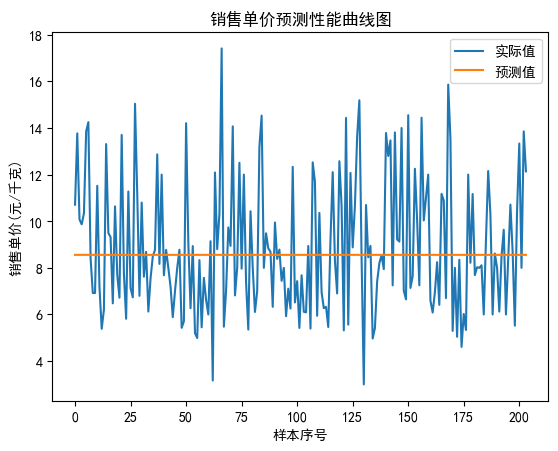

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp4[['销量(千克)']]
target = temp4['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 30

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


PLSRegression()

Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

Text(0.5, 1.0, '茄类偏最小二乘回归')

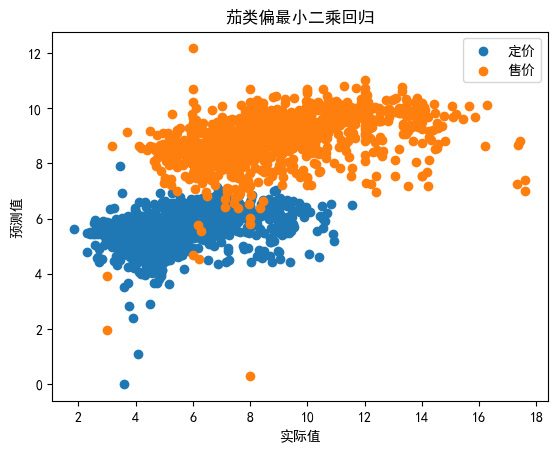

均方误差: 3.9456667387674136
R方值: 0.14306591130094531


In [26]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = temp4[['销量(千克)', '损耗率(%)']]
Y = temp4[['批发价格(元/千克)', '销售单价(元/千克)']]

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# 预测
predict_Y = pls.predict(X)

# 绘制回归图
plt.scatter(Y['批发价格(元/千克)'], predict_Y[:, 0], label='定价')
plt.scatter(Y['销售单价(元/千克)'], predict_Y[:, 1], label='售价')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('茄类偏最小二乘回归')
plt.legend()
plt.show()

# 计算均方误差
mse = mean_squared_error(Y, predict_Y)
print("均方误差:", mse)

# 计算R方值
r2_score = r2_score(Y, predict_Y)
print("R方值:", r2_score)

##  水生根茎类

In [27]:
temp5=merged_data[merged_data['分类名称']=='水生根茎类']
temp5.reset_index(inplace=True,drop=True)

In [28]:
temp5['销售日期'] = pd.to_datetime(temp5['销售日期'])
temp5.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\3308571251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp5['销售日期'] = pd.to_datetime(temp5['销售日期'])


,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售,批发价格(元/千克),损耗率(%)
0,102900005118824,高瓜(1),1011010402,水生根茎类,2020-07-01,09:22:21.264,0.251,10.0,销售,否,5.65,29.25
1,102900005118824,高瓜(1),1011010402,水生根茎类,2020-07-01,09:25:45.811,0.711,10.0,销售,否,5.65,29.25
2,102900051000944,洪湖藕带,1011010402,水生根茎类,2020-07-01,09:46:33.204,0.545,39.8,销售,否,29.43,24.05
3,102900005118824,高瓜(1),1011010402,水生根茎类,2020-07-01,11:01:24.263,0.291,10.0,销售,否,5.65,29.25
4,102900005118824,高瓜(1),1011010402,水生根茎类,2020-07-01,11:02:04.655,0.361,10.0,销售,否,5.65,29.25


In [29]:
temp5=temp5.groupby('销售日期').mean()
temp5

C:\Users\admin\AppData\Local\Temp\ipykernel_5412\75884944.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp5=temp5.groupby('销售日期').mean()


,单品编码,分类编码,销量(千克),销售单价(元/千克),批发价格(元/千克),损耗率(%)
销售日期,,,,,,
2020-07-01,1.029000e+14,1.011010e+09,0.323333,13.973333,8.820667,28.556667
2020-07-02,1.029000e+14,1.011010e+09,0.328571,11.971429,7.458571,28.878571
2020-07-03,1.029000e+14,1.011010e+09,0.319067,8.200000,5.610000,29.250000
2020-07-04,1.029000e+14,1.011010e+09,0.339938,22.075000,14.190625,26.975000
2020-07-05,1.029000e+14,1.011010e+09,0.334917,10.000000,5.420000,29.250000
...,...,...,...,...,...,...
2023-06-26,1.029000e+14,1.011010e+09,0.451478,17.756522,13.013913,15.481739
2023-06-27,1.029000e+14,1.011010e+09,0.350085,15.306383,13.388511,17.789787
2023-06-28,1.029000e+14,1.011010e+09,0.403946,14.021622,12.529730,16.917027


Epoch 1/50
27/27 [==============================] - 2s 9ms/step - loss: 77.6879
Epoch 2/50
27/27 [==============================] - 0s 9ms/step - loss: 16.7042
Epoch 3/50
27/27 [==============================] - 0s 9ms/step - loss: 14.6695
Epoch 4/50
27/27 [==============================] - 0s 9ms/step - loss: 14.6750
Epoch 5/50
27/27 [==============================] - 0s 8ms/step - loss: 14.6708
Epoch 6/50
27/27 [==============================] - 0s 9ms/step - loss: 14.6630
Epoch 7/50
27/27 [==============================] - 0s 9ms/step - loss: 14.6672
Epoch 8/50
27/27 [==============================] - 0s 8ms/step - loss: 14.6608
Epoch 9/50
27/27 [==============================] - 0s 10ms/step - loss: 14.6659
Epoch 10/50
27/27 [==============================] - 0s 9ms/step - loss: 14.6581
Epoch 11/50
27/27 [==============================] - 0s 9ms/step - loss: 14.6678
Epoch 12/50
27/27 [==============================] - 0s 9ms/step - loss: 14.6890
Epoch 13/50
27/27 [=================

7/7 [==============================] - 0s 5ms/step
均方根误差（RMSE）： 5.182737370885149


Text(0.5, 0, '样本序号')

Text(0, 0.5, '销售单价(元/千克)')

Text(0.5, 1.0, '销售单价预测性能曲线图')

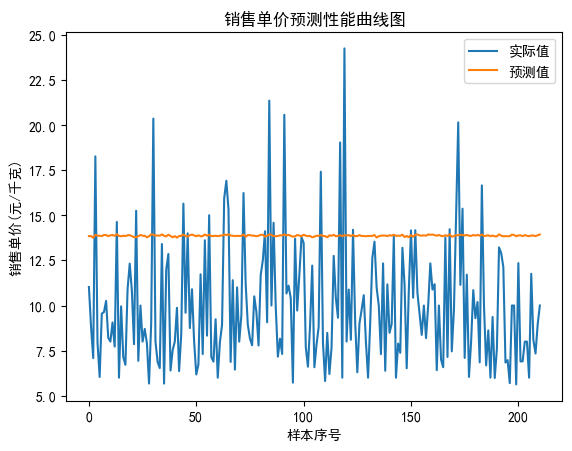

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 提取销售量和销售单价作为特征
features = temp5[['销量(千克)']]
target = temp5['销售单价(元/千克)']

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# 定义时间步长（根据您的数据间隔进行调整）
time_steps = 30

# 构建时间序列数据集
X = []
y = []
for i in range(time_steps, len(scaled_features)):
    X.append(scaled_features[i - time_steps:i])
    y.append(target[i])

X = np.array(X)
y = np.array(y)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 在测试集上进行预测
predictions = model.predict(X_test)

# 反归一化预测结果
predictions = scaler.inverse_transform(predictions)

# 计算模型的性能指标（例如均方根误差）
mse = np.mean((predictions - y_test) ** 2)
rmse = np.sqrt(mse)
print('均方根误差（RMSE）：', rmse)

# 绘制性能曲线图
plt.plot(y_test, label='实际值')
plt.plot(predictions, label='预测值')
plt.xlabel('样本序号')
plt.ylabel('销售单价(元/千克)')
plt.title('销售单价预测性能曲线图')
plt.legend()
plt.show()


PLSRegression()

Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

Text(0.5, 1.0, '水生根茎类偏最小二乘回归')

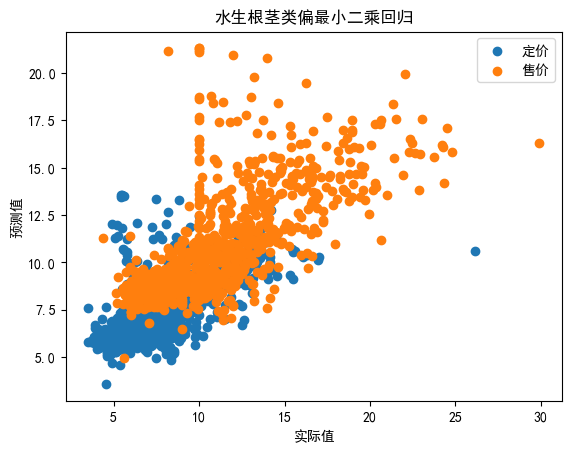

均方误差: 5.137920286317126
R方值: 0.4796789168017299


In [30]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = temp5[['销量(千克)', '损耗率(%)']]
Y = temp5[['批发价格(元/千克)', '销售单价(元/千克)']]

# 建立PLS模型
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# 预测
predict_Y = pls.predict(X)

# 绘制回归图
plt.scatter(Y['批发价格(元/千克)'], predict_Y[:, 0], label='定价')
plt.scatter(Y['销售单价(元/千克)'], predict_Y[:, 1], label='售价')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('水生根茎类偏最小二乘回归')
plt.legend()
plt.show()

# 计算均方误差
mse = mean_squared_error(Y, predict_Y)
print("均方误差:", mse)

# 计算R方值
r2_score = r2_score(Y, predict_Y)
print("R方值:", r2_score)